We practice the machine learning workflow by predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. More information about the data set is available [here](https://archive.ics.uci.edu/ml/datasets/automobile). 

In [1]:
import pandas as pd
import numpy as np

## Initial Data Exploration

In [37]:
cols = ['symboling', 'normalized_losses','make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height',
        'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 
        'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cnt_numeric_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height',
                   'curb_weight', 'engine_size', 'bore','stroke', 
                    'compression_ratio', 'horsepower', 'peak_rpm', 
                    'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', delimiter = ',', names = cols)
cars = cars[cnt_numeric_cols]
cars.head()
print(cars.info())
print(cars.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized_losses  205 non-null    object 
 1   wheel_base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb_weight        205 non-null    int64  
 6   engine_size        205 non-null    int64  
 7   bore               205 non-null    object 
 8   stroke             205 non-null    object 
 9   compression_ratio  205 non-null    float64
 10  horsepower         205 non-null    object 
 11  peak_rpm           205 non-null    object 
 12  city_mpg           205 non-null    int64  
 13  highway_mpg        205 non-null    int64  
 14  price              205 non-null    object 
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB
None
(205, 15)


In [38]:
cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [39]:
# replace ? with NAN
cars = cars.replace('?', np.nan)
cars = cars.astype('float')
# Counts the number of null value
cars.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [40]:
# drop all rows that have missing price value
cars = cars.dropna(subset=['price'])
cars.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [41]:
cars = cars.fillna(cars.mean())
cars.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [42]:
# Normalize the columns except the price col
price = cars['price'].copy()
for c in cars.columns:
    cars[c] = (cars[c]-cars[c].min())/(cars[c].max()-cars[c].min())
cars['price'] = price

In [43]:
cars.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate KNN Models

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [71]:
# define function that encapsulates the training our univariate models and simple validation process.
# with the default k value
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    n = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:n]
    test_df = rand_df.iloc[n:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[[train_col]])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [72]:
train_cols = cars.columns.drop('price')
train_cols

Index(['normalized_losses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg'],
      dtype='object')

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64


<AxesSubplot:>

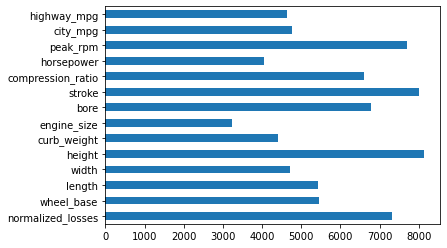

In [76]:
rmse_results = {}
# train and test our models
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars)
    rmse_results[col] = rmse_val
    
rmse_results = pd.Series(rmse_results)
print(rmse_results.sort_values())
rmse_results.plot(kind='barh')

In [67]:
# define function that encapsulates the training our univariate models and simple validation process.
# given a list of possible k values
def knn_train_test(train_col, target_col, df, K):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    n = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:n]
    test_df = rand_df.iloc[n:]
    k_rmse = {}
    for k in K:
        knn = KNeighborsRegressor(k)
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

In [68]:
# Train and test our models
k_rmse_results = {}
train_cols = cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars, [1,3,5,7,9])
    k_rmse_results[col] = rmse_val
k_rmse_results

{'normalized_losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel_base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine_size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


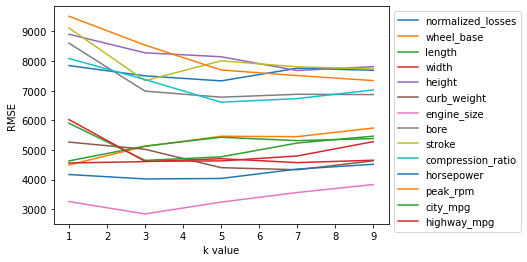

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label="{}".format(k))
    plt.xlabel('k value')
    plt.ylabel('RMSE') 
    plt.legend(loc='best', bbox_to_anchor=(1, 1))

Using the feature 'engine_size' with 3 nearest neighbor yields the best predictions.

## Multivariate KNN Models

In [77]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_features = sorted_series_avg_rmse.index

engine_size          3346.484586
horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
normalized_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64


In [52]:
# train_test function for multivariate models
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    n = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:n]
    test_df = rand_df.iloc[n:]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[train_col], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels = knn.predict(test_df[train_col])

    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

Text(0, 0.5, 'RMSE')

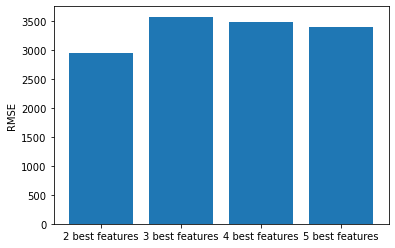

In [60]:
# test our models using n= 2,...,5 features
k_rmse_results = {}
for n in range(2,6):
    k_rmse_results['{} best features'.format(n)] = knn_train_test(sorted_features[:n], 'price', cars)
    
k_rmse_results  
lists = sorted(k_rmse_results.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.ylabel('RMSE')

In [91]:
# train and cross valadation function for multivariate models with Kfold k=5
from sklearn.model_selection import KFold
def knn_train_cross_val(train_col, target_col, df):
    kf = KFold(n_splits=5, shuffle=True, random_state=3)
    knn = KNeighborsRegressor()
    np.random.seed(1)
    rmse_values = []    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    features = rand_df[train_col]
    target = rand_df[target_col]
    # Fit a KNN model using default k value.
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        knn = KNeighborsRegressor()
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        rmse_values.append(rmse)
    return np.mean(rmse_values)

In [92]:
k_rmse_results = {}
for n in range(2,6):
    k_rmse_results['{} best features'.format(n)] = knn_train_cross_val(sorted_features[:n], 'price', cars)
    
k_rmse_results

{'2 best features': 2921.7353467265552,
 '3 best features': 3140.6994560658322,
 '4 best features': 3138.8024411537426,
 '5 best features': 3092.596707131025}

Text(0, 0.5, 'RMSE')

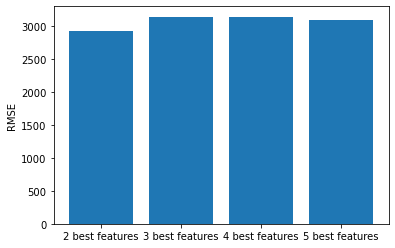

In [90]:
k_rmse_results  
lists = sorted(k_rmse_results.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, y)
plt.ylabel('RMSE')

Utilize only 2 best features yield the best predictions

## Hyperparameter Tuning

In [29]:
# define function that encapsulates the training our multivariate models and simple validation process.
# given a list of possible k values
def knn_train_test(train_col, target_col, df, K):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    n = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:n]
    test_df = rand_df.iloc[n:]
    k_rmse = {}
    for k in K:
        knn = KNeighborsRegressor(k)
        knn.fit(train_df[train_col], train_df[target_col])
    
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_col])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmse[k] = rmse
    return k_rmse

In [30]:
K = range(1,26)
k_rmse_results = {}
for n in range(2,6):
    k_rmse_results['{} best features'.format(n)] = knn_train_test(sorted_features[:n], 'price', cars, K) 

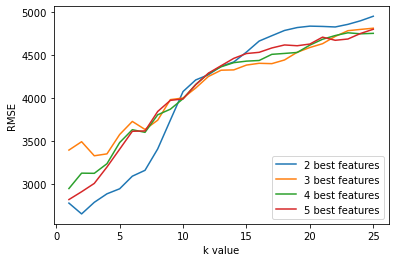

In [31]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y, label="{}".format(k))
    plt.xlabel('k value')
    plt.ylabel('RMSE') 
    plt.legend(loc = 'lower right')

Using only 2 features: engine_size and horsepower with the number of k-nearest neighbor seem to yield the best predictions. Adding more features or have higher k values seem to make the model to be too complex and thus yield poor predictions.